# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [112]:
# Dependencies and Setup

import matplotlib.pyplot as plt

import pandas as pd

import scipy.stats as st



# Study data files

mouse_metadata_path = "C:\\Users\\arkha\\OneDrive\\Desktop\\Pymaseuticals Module 5 challenge\\data\\Mouse_metadata.csv"

study_results_path = "C:\\Users\\arkha\\OneDrive\\Desktop\\Pymaseuticals Module 5 challenge\\data\\Study_results.csv"



# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)

study_results = pd.read_csv(study_results_path)



# Combine the data into a single DataFrame

study_info_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')



# Display the data table for preview
study_info_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [113]:
# Checking the number of mice.

mouse_count = len(study_info_df['Mouse ID'].unique())

mouse_count

249

In [114]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mouse_ids = study_info_df.loc[study_info_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

# Display the duplicate mice
duplicate_mouse_ids

array(['g989'], dtype=object)

In [115]:
# Get all the data for the duplicate mouse ID.

duplicate_mouse_data = study_info_df.loc[study_info_df["Mouse ID"] == "g989"]

duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [116]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study_info_df = study_info_df[study_info_df['Mouse ID'].isin(duplicate_mouse_ids)==False]

clean_study_info_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [117]:
# Checking the number of mice in the clean DataFrame.

new_mouse_count = len(clean_study_info_df['Mouse ID'].unique())

new_mouse_count

248

## Summary Statistics

In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:


# Since I'm going to be using the same groupby data for each Summary Statistic Calculation, I decided to put it in a variable

drug_tumor = clean_study_info_df.groupby('Drug Regimen')['Tumor Volume (mm3)']


# mean 

per_drug_tumor_mean = drug_tumor.apply(lambda x: st.tmean(x))


# median 

per_drug_tumor_median = drug_tumor.median()


# variance

per_drug_tumor_var = drug_tumor.apply(lambda x: st.tvar(x))


# standard deviation

per_drug_tumor_std = drug_tumor.apply(lambda x: st.tstd(x))


# SEM of the tumor volume

per_drug_tumor_sem = drug_tumor.apply(lambda x: st.tsem(x))



# Assemble the resulting series into a single summary DataFrame.

per_drug_summary_df = pd.DataFrame(
    { 
        'Mean Tumor Volume' : per_drug_tumor_mean, 
        'Median Tumor Volume' : per_drug_tumor_median,
        'Tumor Volume Variance' : per_drug_tumor_var,
        'Tumor Volume Std. Dev.' : per_drug_tumor_std,
        'Tumor Volume Std. Err.' : per_drug_tumor_sem,
    }
)

per_drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [119]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# I renamed the columns in the summary so I would get the correct column name for sem, this idea was from ChatGPT

summary = drug_tumor.agg(mean = 'mean', median = 'median', var = 'var', std = 'std', sem = lambda x: x.std() / (len(x) ** 0.5))


# Adding 'Tumor Volume (mm3) to the final dataframe to better match the example. This solution also came from ChatGPT

styled_summary = summary.style.set_caption("Tumor Volume (mm3)")

styled_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [120]:

regimen_counts = clean_study_info_df.groupby('Drug Regimen')['Timepoint'].count()
regimen_counts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

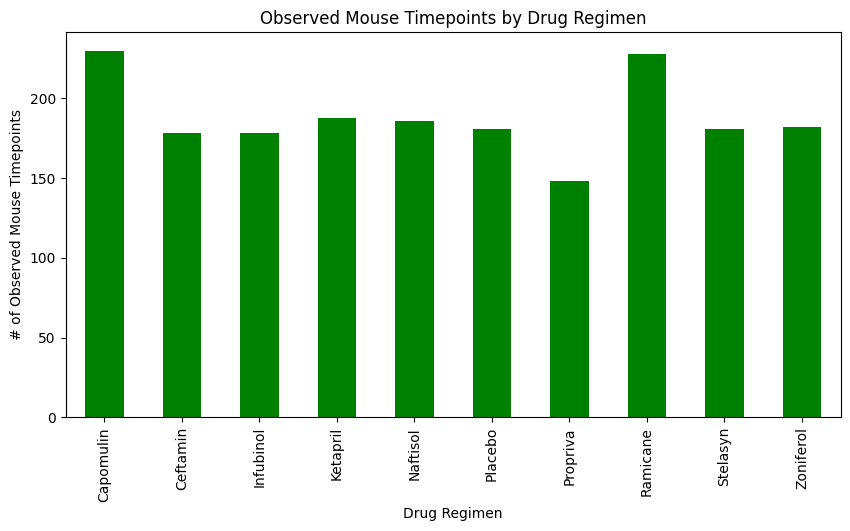

In [122]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Determine the number of rows per drug regimen

regimen_counts = clean_study_info_df.groupby('Drug Regimen')['Timepoint'].count()

# Generate the bar plot

regimen_counts.plot(kind = 'bar', 
                    figsize = (10,5), 
                    rot = 90, 
                    color = 'green', 
                    xlabel = 'Drug Regimen', 
                    ylabel = '# of Observed Mouse Timepoints', 
                    title = 'Observed Mouse Timepoints by Drug Regimen'
                    )

plt.tight_layout

plt.show


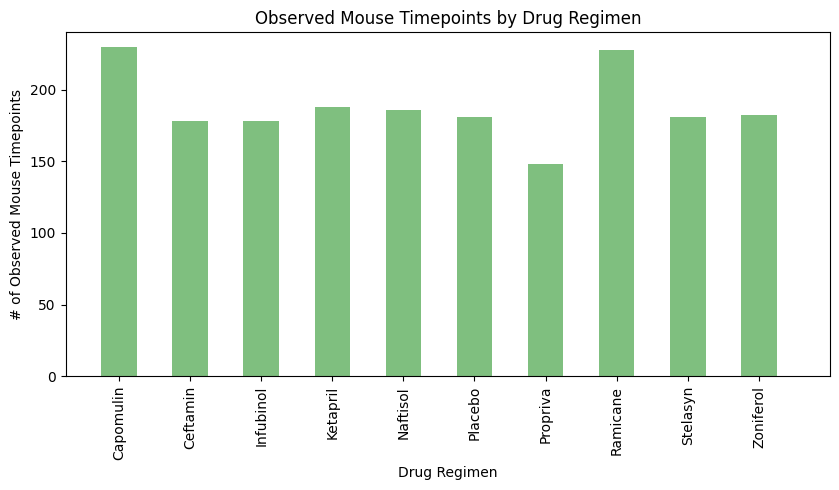

In [123]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = range(len(regimen_counts))

plt.figure(figsize=(8.5, 5))

plt.bar(x_axis, regimen_counts.values, color='g', alpha=0.5, align='center', width = .5)

plt.xticks(x_axis, regimen_counts.index, rotation = 'vertical')



plt.xlim(-0.75, len(x_axis))

plt.ylim(0, max(regimen_counts.values) + 10)



plt.title('Observed Mouse Timepoints by Drug Regimen')

plt.xlabel('Drug Regimen')

plt.ylabel('# of Observed Mouse Timepoints')



plt.tight_layout()

plt.show()

In [124]:
unique_mice_gender = clean_study_info_df.groupby('Sex')['Mouse ID'].nunique()

# Make the pie chart
unique_mice_gender

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

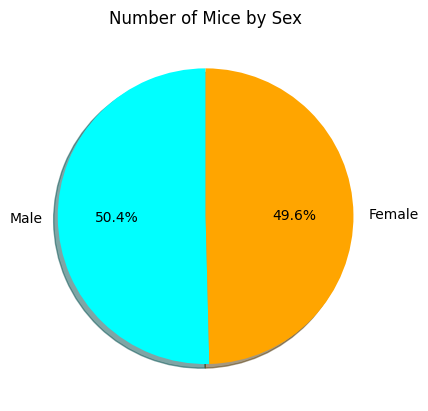

In [126]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study



# Get the unique mice with their gender

unique_mice_sex_df = clean_study_info_df.groupby('Sex')['Mouse ID'].nunique().reset_index()

# I want the larger number on the left side

sorted_unique = unique_mice_sex_df.sort_values(by='Sex', ascending=False)



# Make the pie chart

sorted_unique.set_index('Sex')['Mouse ID'].plot.pie(autopct = '%1.1f%%', shadow = True, 
                                                    startangle = 90, title = 'Number of Mice by Sex', 
                                                    ylabel = '', colors = ['aqua', 'orange']
                                                    )


plt.show()


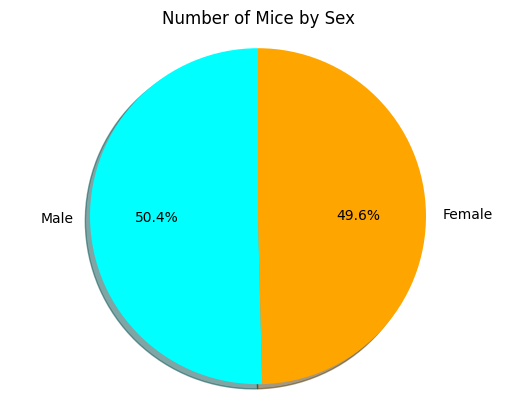

In [127]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study


# Get the unique mice with their gender

unique_mice_gender = clean_study_info_df.groupby('Sex')['Mouse ID'].nunique()

# Make the pie chart

sex = ['Male', 'Female']

number_of_mice = [125, 123]

colors = ['aqua', 'orange']


plt.title('Number of Mice by Sex')

plt.pie(number_of_mice, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow = True, startangle = 90)

plt.axis("equal")

plt.show()



## Quartiles, Outliers and Boxplots

In [138]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint_df = clean_study_info_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
    

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_tumor_volume_df = pd.merge(last_timepoint_df, clean_study_info_df, on = ['Mouse ID','Timepoint'])


last_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [182]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    tumor_volumes = last_tumor_volume_df.loc[last_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    
    # calculate the first and third quartiles

    Q1 = tumor_volumes.quantile(0.25)
    
    Q3 = tumor_volumes.quantile(0.75)

    
    # calculate the IQR

    IQR = Q3 - Q1

    
    # Determine upper and lower bounds for outliers
    
    lower_bound = Q1 - 1.5 * IQR
    
    upper_bound = Q3 + 1.5 * IQR
    
    
    # Determine outliers using upper and lower bounds

    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"{treatment}'s potential outliers : {outliers}")
    
    # Create a subset DataFrame for the current treatment
    
    treatment_groups_df = last_tumor_volume_df[last_tumor_volume_df['Drug Regimen'] == treatment]

   
    # Append tumor volumes, outliers, and the subset DataFrame to the list for plotting if needed
    
    tumor_volume_data.append({
        'Treatment': treatment,
        'Tumor Volumes': tumor_volumes,
        'Outliers': outliers,
        'Treatment Group DataFrame': treatment_groups_df
    })






Capomulin's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)


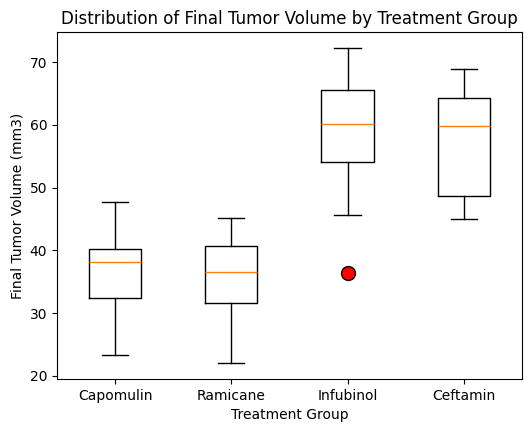

In [186]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# I used Xpert Learning Assistant for the code for box_data and how to color the outlier

plt.figure(figsize=(6, 4.5))

box_data = [last_tumor_volume_df[last_tumor_volume_df['Drug Regimen'] == group]['Tumor Volume (mm3)'] for group in treatment_list]

plt.boxplot(box_data, labels = treatment_list, flierprops = dict(marker='o', markerfacecolor='red', markersize=10))

# Adding labels and title
plt.title('Distribution of Final Tumor Volume by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

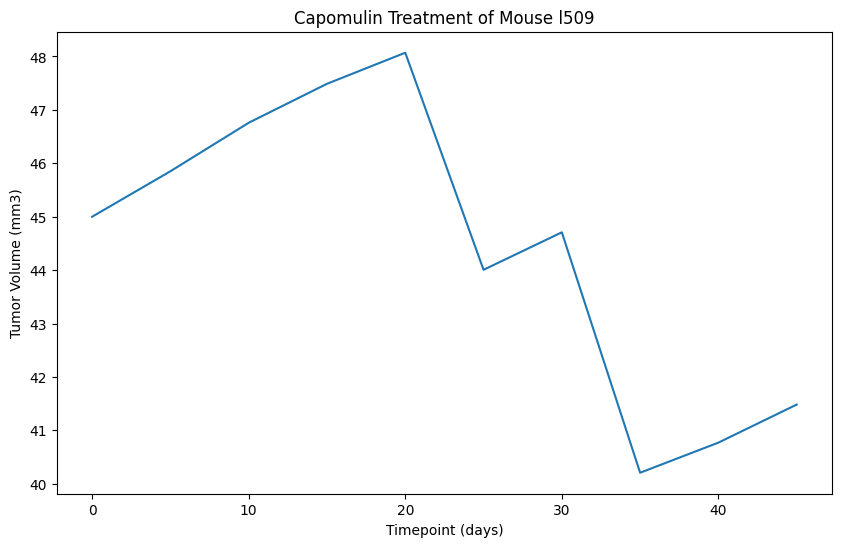

In [200]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = 'l509'  

# Create new DataFrame with data for a single mouse 

mouse_data_df = clean_study_info_df[clean_study_info_df['Mouse ID'] == mouse_id]

# Plotting

plt.figure(figsize=(10, 6))

plt.plot(mouse_data_df['Timepoint'], mouse_data_df['Tumor Volume (mm3)'], marker='')

plt.title(f'Capomulin Treatment of Mouse {mouse_id}')

plt.xlabel('Timepoint (days)')

plt.ylabel('Tumor Volume (mm3)')

plt.show()


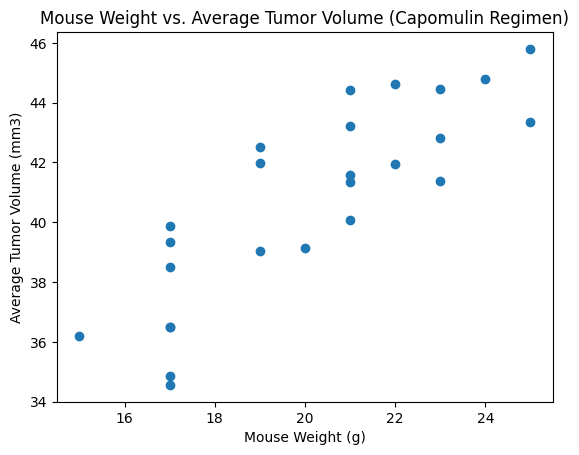

In [212]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

regimen = 'Capomulin'


# new dataframe with only data for the mice treated with Capomulin

capomulin_data_df = clean_study_info_df[clean_study_info_df['Drug Regimen'] == regimen]


# find average tumor volume

avg_tumor_volume_df = capomulin_data_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()


# calculate average weight

avg_weight_df = capomulin_data_df.groupby('Mouse ID')['Weight (g)'].mean().reset_index()


# merge weight and tumor volume

weight_tumor_df = pd.merge(avg_tumor_volume_df, avg_weight_df, on='Mouse ID')


# Create a scatter plot

plt.scatter(weight_tumor_df['Weight (g)'], weight_tumor_df['Tumor Volume (mm3)'])

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

plt.xlabel('Mouse Weight (g)')

plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
